In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import re
import pyabf  

In [2]:
def light_sweeper(path):
    light_area = 0.01 #μΜ
    abf = pyabf.ABF(path)
    peak_vector = []
    for sweep in abf.sweepList:
        abf.setSweep(sweep,0)
        peak_val = abf.sweepY[int(1.5*50000)]
        peak_vector.append((peak_val*1000)/light_area)
    X_vector = np.arange(len(peak_vector))
    return X_vector,peak_vector
        

In [3]:
def fitting_regression_line(X,Y):
    X = np.array(X)
    Y = np.array(Y)
    avg_x = np.mean(X)
    avg_y = np.mean(Y)
    x_avg_x = X-avg_x
    y_avg_y = Y-avg_y
    b_slope = np.sum(x_avg_x*y_avg_y)/np.sum((x_avg_x)**2)
    a_intercept = avg_y-(b_slope*avg_x)
    return a_intercept,b_slope

In [4]:
def plotting_the_light(X,Y,wavelength,color):
    a_intercept,b_slope = fitting_regression_line(X,Y)
    plt.scatter(X,Y,color = color,label = f'λ = {wavelength}', alpha = 0.4)
    plt.plot(X,a_intercept+b_slope*X,color = 'black',label = f'y = {round(a_intercept,2)}+{round(b_slope,2)}x',alpha = 0.7)
    plt.title('Light intensity/LED units')
    plt.xlabel('LED units')
    plt.ylabel("Power (μW)/mm\u00b2")
    plt.tick_params(axis='x', direction='in')
    plt.tick_params(axis='y', direction='in')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.legend(frameon = False)
    plt.show()

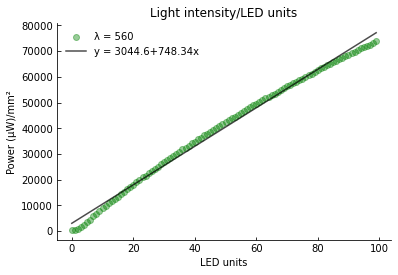

In [5]:
file_path = r"C:\Users\omeri\OneDrive - weizmann.ac.il\Desktop\Weizmann\M.Sc\Project1\Light calibration\13.03.2024\2024_03_13_0005.abf"
X_vector,peak_vector = light_sweeper(file_path)
plotting_the_light(X_vector,peak_vector,560,'Green')

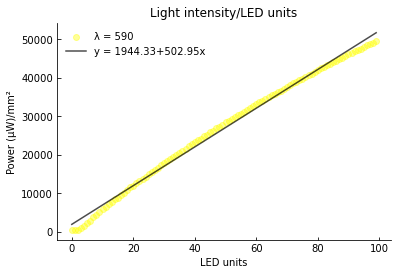

In [6]:
file_path = r"C:\Users\omeri\OneDrive - weizmann.ac.il\Desktop\Weizmann\M.Sc\Project1\Light calibration\13.03.2024\2024_03_13_0007.abf"
X_vector,peak_vector = light_sweeper(file_path)
plotting_the_light(X_vector,peak_vector,590,'Yellow')


In [7]:
peak_yellow = peak_vector[2:23:4]

In [8]:
peak_yellow

[579.833984375,
 2929.6875,
 5920.41015625,
 8422.8515625,
 10864.2578125,
 13153.076171875]

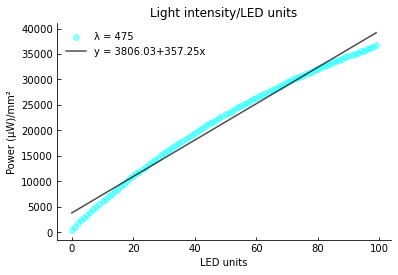

In [9]:
file_path = r"C:\Users\omeri\OneDrive - weizmann.ac.il\Desktop\Weizmann\M.Sc\Project1\Light calibration\13.03.2024\2024_03_13_0008.abf"
X_vector,peak_vector = light_sweeper(file_path)
plotting_the_light(X_vector,peak_vector,475,'Cyan')

In [10]:
peak_cyan = peak_vector[0:6]

In [11]:
peak_cyan

[366.2109375,
 1007.080078125,
 1892.08984375,
 2441.40625,
 2838.134765625,
 3448.486328125]

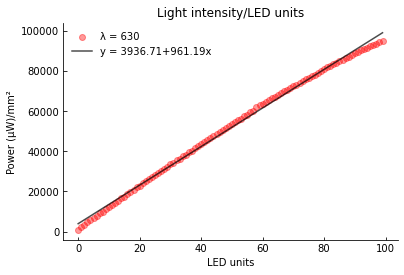

In [12]:
file_path = r"C:\Users\omeri\OneDrive - weizmann.ac.il\Desktop\Weizmann\M.Sc\Project1\Light calibration\13.03.2024\2024_03_13_0010.abf"
X_vector,peak_vector = light_sweeper(file_path)
plotting_the_light(X_vector,peak_vector,630,'Red')

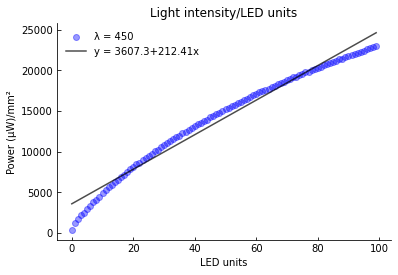

In [13]:
file_path = r"C:\Users\omeri\OneDrive - weizmann.ac.il\Desktop\Weizmann\M.Sc\Project1\Light calibration\13.03.2024\2024_03_13_0011.abf"
X_vector,peak_vector = light_sweeper(file_path)
plotting_the_light(X_vector,peak_vector,450,'Blue')